<a href="https://colab.research.google.com/github/Donets-Yuliya/DataScience/blob/main/HomeWork6/HomeWork6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Загрузка датасета

In [1]:
#Установка библиотеки Kaggle
!pip install kaggle

In [2]:
from google.colab import files

# Загрузка файла kaggle.json
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
import os
import shutil

# Определяем пути источника и назначения
source_path = 'kaggle.json'
destination_dir = os.path.expanduser('~/.kaggle')
destination_path = os.path.join(destination_dir, 'kaggle.json')

# Создаем директорию назначения, если она не существует
os.makedirs(destination_dir, exist_ok=True)

# Перемещаем файл
shutil.move(source_path, destination_path)

# Устанавливаем права доступа
os.chmod(destination_path, 0o600)

In [4]:
# Kaggle API для загрузки датасета:
!kaggle datasets download -d adilshamim8/student-performance-and-learning-style

Dataset URL: https://www.kaggle.com/datasets/adilshamim8/student-performance-and-learning-style
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/77.0k [00:00<?, ?B/s]
100% 77.0k/77.0k [00:00<00:00, 81.2MB/s]


In [5]:
# Распаковка архива:
import zipfile

with zipfile.ZipFile('student-performance-and-learning-style.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [6]:
import pandas as pd

# Загрузка файла в датасет
df = pd.read_csv('student_performance.csv')

In [7]:
# Получаем общую информацию о датасете
print(df.info())

# Датасет содержит информацию по успеваемости и поведению учащихся со следующими колонками:
# StudyHours - количество учебных часов в неделю (+)
# Attendance - процент посещенных занятий (+)
# Resources - наличие и использование академических ресурсов (например, библиотеки, заметки)
# Extracurricular - участие во внеклассных мероприятиях (+)
# Motivation - самооценка уровня мотивации
# Internet - доступ к Интернету в учебных целях
# Gender - пол учащегося (мужской/женский)
# Age - возраст студента (18–30 лет)
# LearningStyle - предпочтительный стиль обучения (например, визуальный, слуховой, кинестетический, чтение/письмо)
# OnlineCourses - участие в онлайн-курсах
# Discussions - участие в обсуждениях в учебных группах или на форумах
# AssignmentCompletion - показатель своевременного выполнения заданий (+)
# ExamScore - балл, полученный на основном экзамене (+)
# EduTech - использование инструментов/платформ образовательных технологий
# StressLevel - уровень стресса, оцененный учащимся (+)
# FinalGrade - итоговая оценка курса

# Видим, что всего 14003 строк, отсутствуют пустые значения и категории

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14003 entries, 0 to 14002
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   StudyHours            14003 non-null  int64
 1   Attendance            14003 non-null  int64
 2   Resources             14003 non-null  int64
 3   Extracurricular       14003 non-null  int64
 4   Motivation            14003 non-null  int64
 5   Internet              14003 non-null  int64
 6   Gender                14003 non-null  int64
 7   Age                   14003 non-null  int64
 8   LearningStyle         14003 non-null  int64
 9   OnlineCourses         14003 non-null  int64
 10  Discussions           14003 non-null  int64
 11  AssignmentCompletion  14003 non-null  int64
 12  ExamScore             14003 non-null  int64
 13  EduTech               14003 non-null  int64
 14  StressLevel           14003 non-null  int64
 15  FinalGrade            14003 non-null  int64
dtypes: i

In [8]:
def visualize_clusters_avg(predicted_labels):
  # Добавление меток кластеров в DataFrame
  X['Cluster'] = predicted_labels
  mask = predicted_labels != -1

  # Анализ средних значений признаков по кластерам
  cluster_means = X[mask].groupby('Cluster')[features].mean()
  print(cluster_means)

  cluster_means = cluster_means.T

  variable_names = {
                    'StressLevel': 'Уровень стресса',
                    'ExamScore': 'Балл за экзамен',
                    'AssignmentCompletion': 'Завершение заданий',
                    'Attendance': 'Посещаемость',
                    'Extracurricular': 'Внеклассная деятельность',
                    'StudyHours': 'Часы обучения'
                  }

  cluster_means = cluster_means.rename(index=variable_names)

  ax = cluster_means.plot(kind='bar', figsize=(12, 6))
  plt.title('Сравнение значений переменных по кластерам')
  plt.xlabel('Признак')
  plt.ylabel('Значение')
  plt.xticks(rotation=0)
  plt.legend(loc='upper right')
  plt.grid(axis='y')
  plt.tight_layout()

  handles, labels = ax.get_legend_handles_labels()
  ax.legend(handles, ['Группа 1', 'Группа 2', 'Группа 3'], title='Кластер')

  plt.show()

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def visualize_columns():

  mask = X['Cluster'] != -1

  # Перебираем каждый числовой столбец и создаем для него ящик с усами
  for index, column in enumerate(X.select_dtypes(include=[np.number]).columns):
    if column != 'Cluster':
      # Создаем boxplot по каждому кластеру
      plt.figure(figsize=(8, 6))
      X[mask].boxplot(column=column, by='Cluster', vert=False)  # vert=False для горизонтального отображения
      plt.title(f'Распределение {column} по кластерам')
      plt.xlabel(column)
      plt.ylabel('Кластер')
      plt.suptitle('')  # Убираем стандартный заголовок "Boxplot grouped by cluster"
      plt.show()

In [10]:
import matplotlib.pyplot as plt

def visual_cluster_count(final_labels):
  # Визуализация распределения меток кластеров
  plt.figure(figsize=(6, 4))
  unique_labels = sorted(list(set(final_labels)))
  counts, bins, patches = plt.hist(final_labels, bins=len(unique_labels), rwidth=0.8, range=(min(unique_labels)-0.5, max(unique_labels)+0.5)) # Важно задать range
  plt.xticks(unique_labels)
  plt.title("Распределение меток кластеров")
  plt.xlabel("Метка кластера")
  plt.ylabel("Количество объектов")
  plt.show()

Поставим себе задачу сделать сегментацию студентов по уровню стресса и успеваемости

In [11]:
# Оставим только нужные характеристики
features = ['StressLevel', 'ExamScore', 'AssignmentCompletion', 'Attendance', 'Extracurricular', 'StudyHours']
X = df[features].copy()

In [12]:
# Смотрим первые строки датасета
print(X.head())

   StressLevel  ExamScore  AssignmentCompletion  Attendance  Extracurricular  \
0            1         40                    59          64                0   
1            1         66                    90          64                0   
2            1         99                    67          64                0   
3            1         40                    59          64                1   
4            1         66                    90          64                1   

   StudyHours  
0          19  
1          19  
2          19  
3          19  
4          19  


        StressLevel     ExamScore  AssignmentCompletion    Attendance  \
count  14003.000000  14003.000000          14003.000000  14003.000000   
mean       1.304363     70.346926             74.502535     80.194316   
std        0.785383     17.688113             14.632177     11.472181   
min        0.000000     40.000000             50.000000     60.000000   
25%        1.000000     55.000000             62.000000     70.000000   
50%        2.000000     70.000000             74.000000     80.000000   
75%        2.000000     86.000000             87.000000     90.000000   
max        2.000000    100.000000            100.000000    100.000000   

       Extracurricular    StudyHours  
count     14003.000000  14003.000000  
mean          0.594158     19.987431  
std           0.491072      5.890637  
min           0.000000      5.000000  
25%           0.000000     16.000000  
50%           1.000000     20.000000  
75%           1.000000     24.000000  
max           1.000000     44.

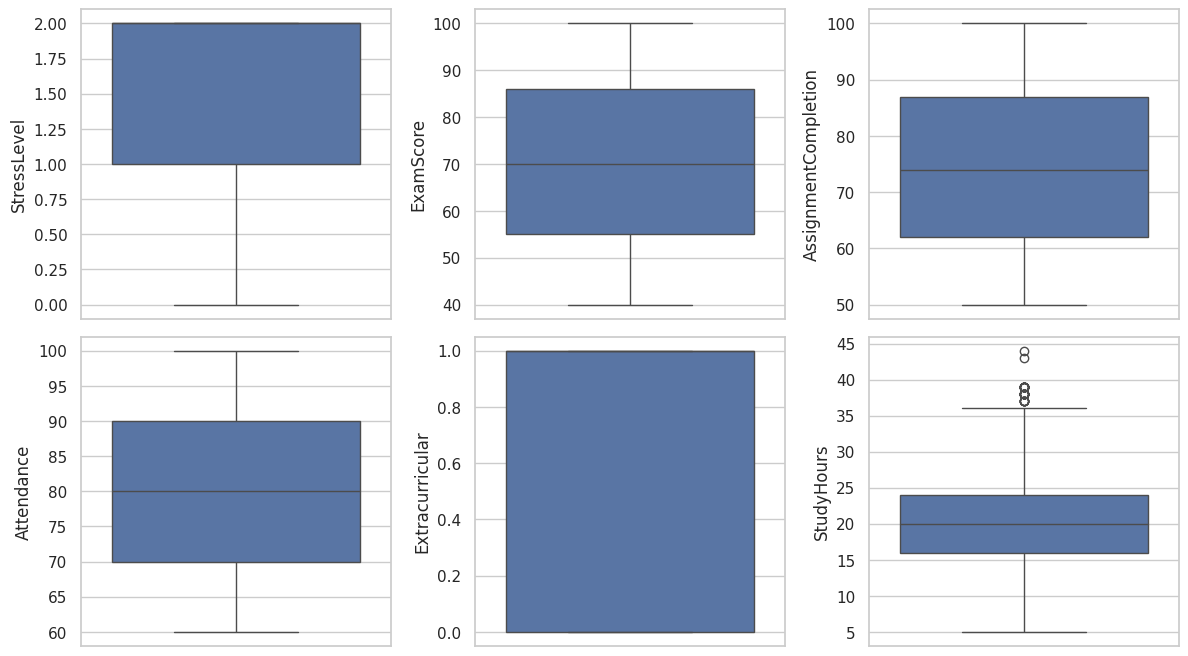

In [13]:
# Выводим статистические данные о числовых столбцах
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

print(X.describe())

# Визуализация ящик с усами
sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))

# Перебираем каждый числовой столбец и создаем для него ящик с усами
for index, column in enumerate(X.select_dtypes(include=[np.number]).columns):
  plt.subplot((len(X.columns) // 3) + 1, 3, index + 1)
  sns.boxplot(y=X[column])

plt.tight_layout()
plt.show()

# Значения StressLevel смещены вверх (к максимальному)
# Есть выбросы в колонке StudyHours
# ExamScore, AssignmentCompletion, Attendance распределены равномерно

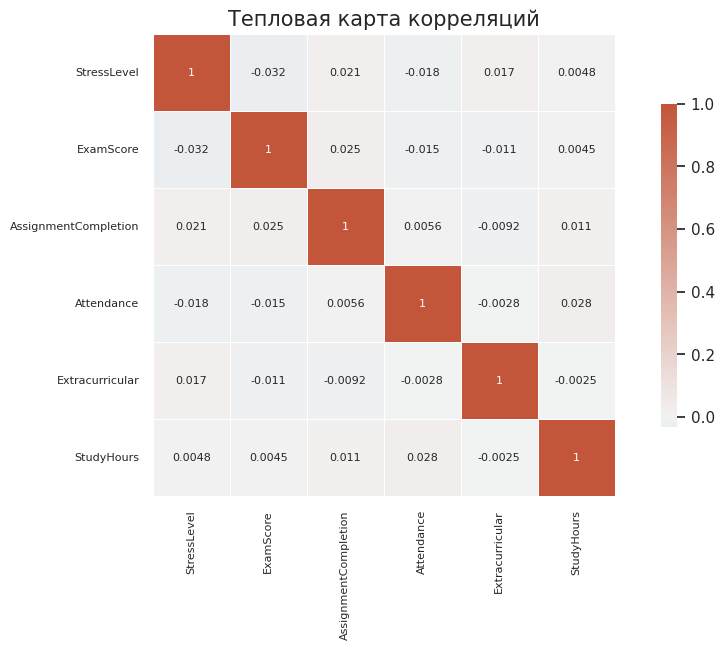

In [14]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Тепловая карта
numeric_df = X.select_dtypes(include=[np.number])
corr = numeric_df.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(12, 6))
plt.title('Тепловая карта корреляций', fontsize=15)

sns.heatmap(corr, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.7}, annot=True,
            annot_kws={"size": 8})
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

# Низкая корреляция. Максимальное и минимальное значение (кроме диагонали): 0.028 и -0.032

Предобработка

In [15]:
from sklearn.preprocessing import StandardScaler

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Обучение модели

Количество кластеров: 2, Silhouette Score: 0.3124, Davies-Bouldin Index: 1.2654, Inertia: 19517.6731, Calinski-Harabasz Index: 6836.1101


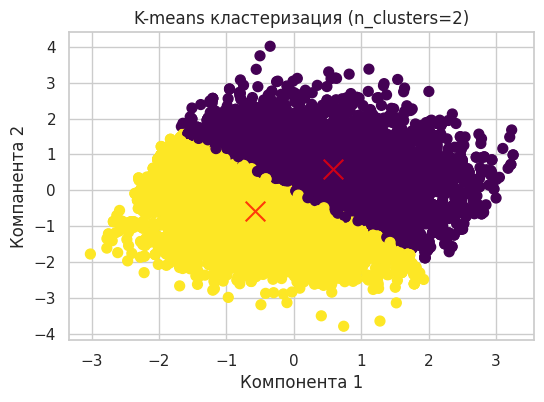

Количество кластеров: 3, Silhouette Score: 0.3389, Davies-Bouldin Index: 0.9256, Inertia: 12856.5724, Calinski-Harabasz Index: 8815.6737


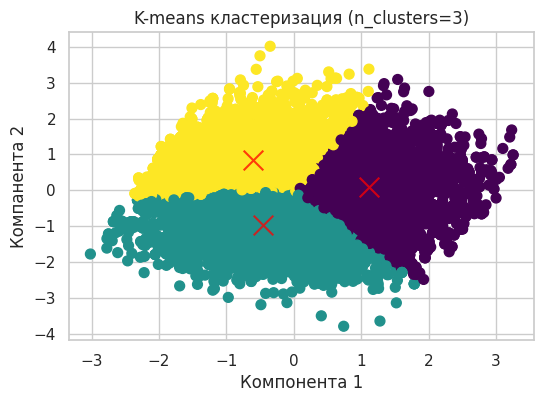

Количество кластеров: 4, Silhouette Score: 0.3128, Davies-Bouldin Index: 0.9310, Inertia: 10120.3864, Calinski-Harabasz Index: 8726.9207


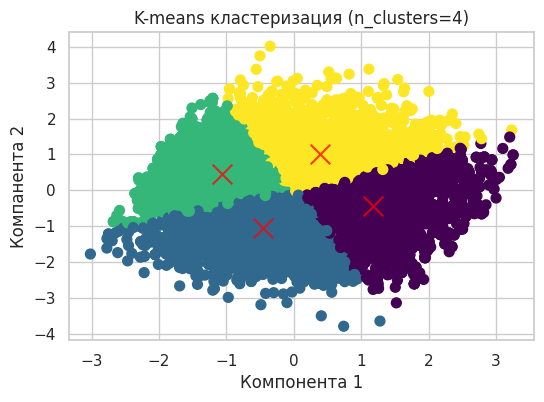

Количество кластеров: 5, Silhouette Score: 0.3099, Davies-Bouldin Index: 0.9795, Inertia: 8333.4063, Calinski-Harabasz Index: 8698.8258


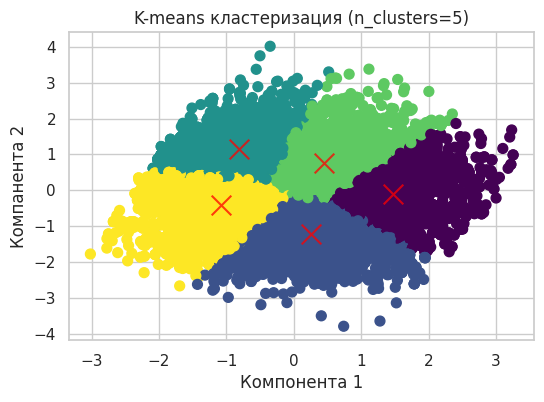

Количество кластеров: 6, Silhouette Score: 0.3287, Davies-Bouldin Index: 0.8484, Inertia: 6856.7173, Calinski-Harabasz Index: 9059.7970


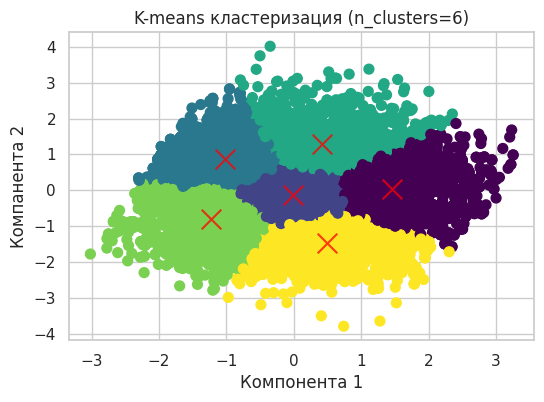

Количество кластеров: 7, Silhouette Score: 0.3234, Davies-Bouldin Index: 0.8623, Inertia: 5958.0687, Calinski-Harabasz Index: 9039.8756


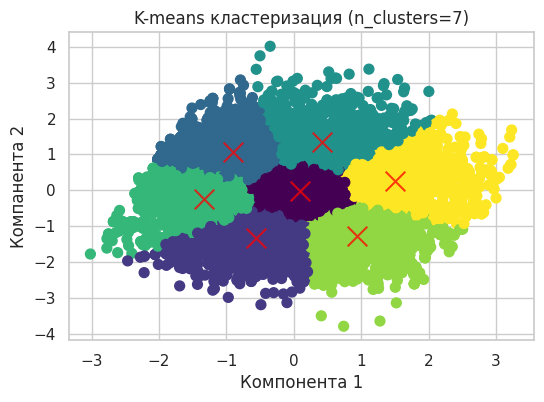

Количество кластеров: 8, Silhouette Score: 0.3211, Davies-Bouldin Index: 0.8584, Inertia: 5293.3078, Calinski-Harabasz Index: 8972.1677


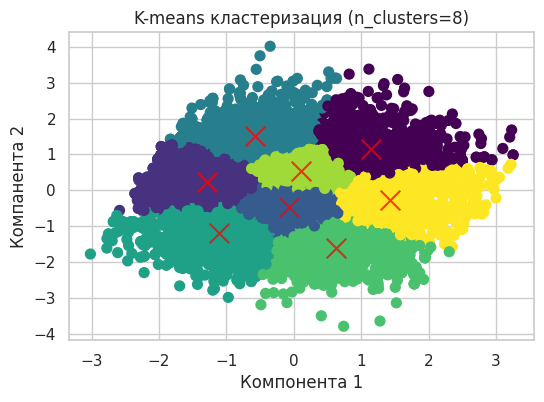

Количество кластеров: 9, Silhouette Score: 0.3226, Davies-Bouldin Index: 0.8765, Inertia: 4778.9630, Calinski-Harabasz Index: 8883.0622


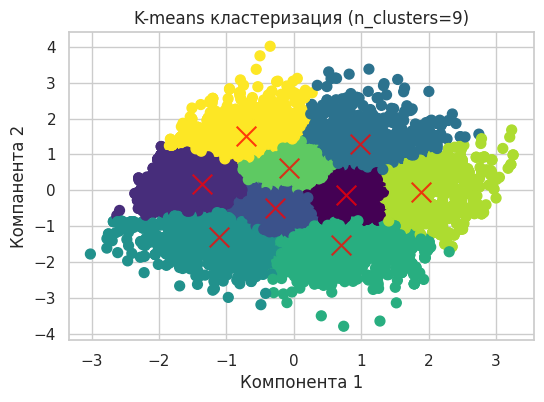

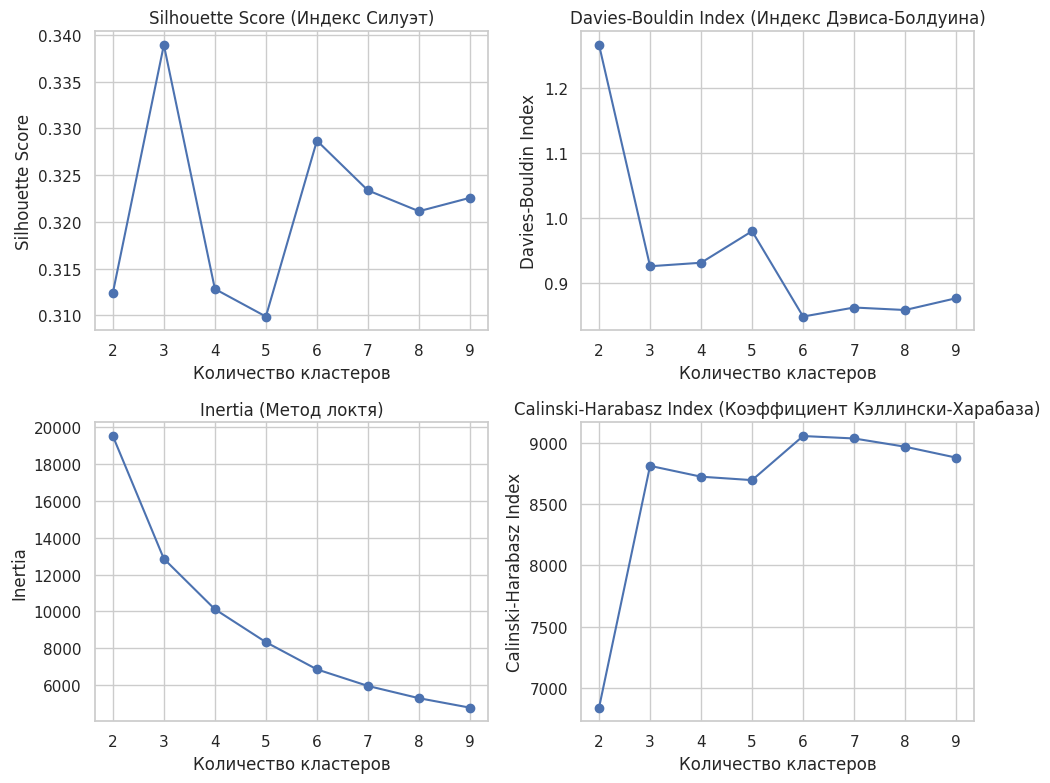

In [16]:
# К-Means
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA

# Преобразовываем 6 признаков в 2 главные компоненты (линейные зависимости от признаков)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Списки для хранения значений метрик
silhouette_scores = []
davies_bouldin_scores = []
inertia_scores = []
calinski_harabasz_scores = []

# Проверка качества кластеризации для разного числа кластеров
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_pca)

    # Оценка метрик
    silhouette_avg = silhouette_score(X_pca, labels)
    davies_bouldin = davies_bouldin_score(X_pca, labels)
    inertia = kmeans.inertia_
    calinski_harabasz = calinski_harabasz_score(X_pca, labels)

    silhouette_scores.append(silhouette_avg)
    davies_bouldin_scores.append(davies_bouldin)
    inertia_scores.append(inertia)
    calinski_harabasz_scores.append(calinski_harabasz)

    print(f"Количество кластеров: {n_clusters}, Silhouette Score: {silhouette_avg:.4f}, Davies-Bouldin Index: {davies_bouldin:.4f}, Inertia: {inertia:.4f}, Calinski-Harabasz Index: {calinski_harabasz:.4f}")

    # Визуализация кластеров
    plt.figure(figsize=(6, 4))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=50, cmap='viridis')

    # Отображение центров кластеров
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')

    plt.title(f"K-means кластеризация (n_clusters={n_clusters})")
    plt.xlabel("Компонента 1")
    plt.ylabel("Компанента 2")
    plt.show()

# Визуализация изменения метрик
plt.figure(figsize=(10, 8))

# Silhouette Score (Индекс Силуэт)
plt.subplot(2, 2, 1)
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score (Индекс Силуэт)')

# Davies-Bouldin Index (Индекс Дэвиса-Болдуина)
plt.subplot(2, 2, 2)
plt.plot(range(2, 10), davies_bouldin_scores, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index (Индекс Дэвиса-Болдуина)')

# Inertia (Метод локтя)
plt.subplot(2, 2, 3)
plt.plot(range(2, 10), inertia_scores, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')
plt.title('Inertia (Метод локтя)')

# Calinski-Harabasz Index (Коэффициент Кэллински-Харабаза)
plt.subplot(2, 2, 4)
plt.plot(range(2, 10), calinski_harabasz_scores, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index (Коэффициент Кэллински-Харабаза)')

plt.tight_layout()
plt.show()

# Если анализировать графики методов оценки качества можно увидеть следующее:
# По методу силуэта максимальное значение приходится на 3 кластера, также присутствует некоторое увеличение при 6 кластерах
# По методу Дэвиса-Болдуина минимальное значение приходится на 6 кластеров, резкий скачок вниз происходит при 3 кластерах
# По методу локтя не видно очевидного слома, но самый большой слом приходится на 3 кластер
# По методу Кэллински-Харабаза максимальное значение приходится на 6 кластеров, резкий скачок вверх происходит при 3 кластерах

# Учитывая, что мы хотим разделить студентов по уровню стресса и успеваемости, будет достаточно 3 кластеров

Количество кластеров: 3 
Silhouette Score: 0.3389 
Davies-Bouldin Index: 0.9256 
Inertia: 12856.5724 
Calinski-Harabasz Index: 8815.6737


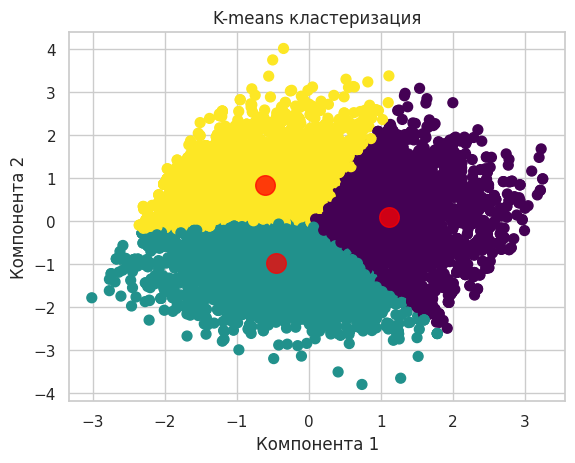

In [17]:
# Пересчитываем только для 3 кластеров
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Инициализируем модель KMeans с 3 кластерами
kmeans = KMeans(n_clusters=3, random_state=42)

# Обучаем модель
kmeans.fit(X_pca)

# Предсказываем кластеры
y_kmeans = kmeans.predict(X_pca)

silhouette_avg = silhouette_score(X_pca, y_kmeans)
davies_bouldin = davies_bouldin_score(X_pca, y_kmeans)
inertia = kmeans.inertia_
calinski_harabasz = calinski_harabasz_score(X_pca, y_kmeans)

print(f"Количество кластеров: 3 \nSilhouette Score: {silhouette_avg:.4f} \nDavies-Bouldin Index: {davies_bouldin:.4f} \nInertia: {inertia:.4f} \nCalinski-Harabasz Index: {calinski_harabasz:.4f}")

# Визуализируем результаты
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Отображаем центры кластеров
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.title("K-means кластеризация")
plt.xlabel("Компонента 1")
plt.ylabel("Компонента 2")
plt.show()

         StressLevel  ExamScore  AssignmentCompletion  Attendance  \
Cluster                                                             
0           0.834509  81.277435             78.760247   84.059938   
1           1.355329  71.673974             70.250705   71.735837   
2           1.694936  58.877933             74.557431   84.604776   

         Extracurricular  StudyHours  
Cluster                               
0               0.368444   21.792860  
1               0.649881   15.749512  
2               0.752161   22.319885  


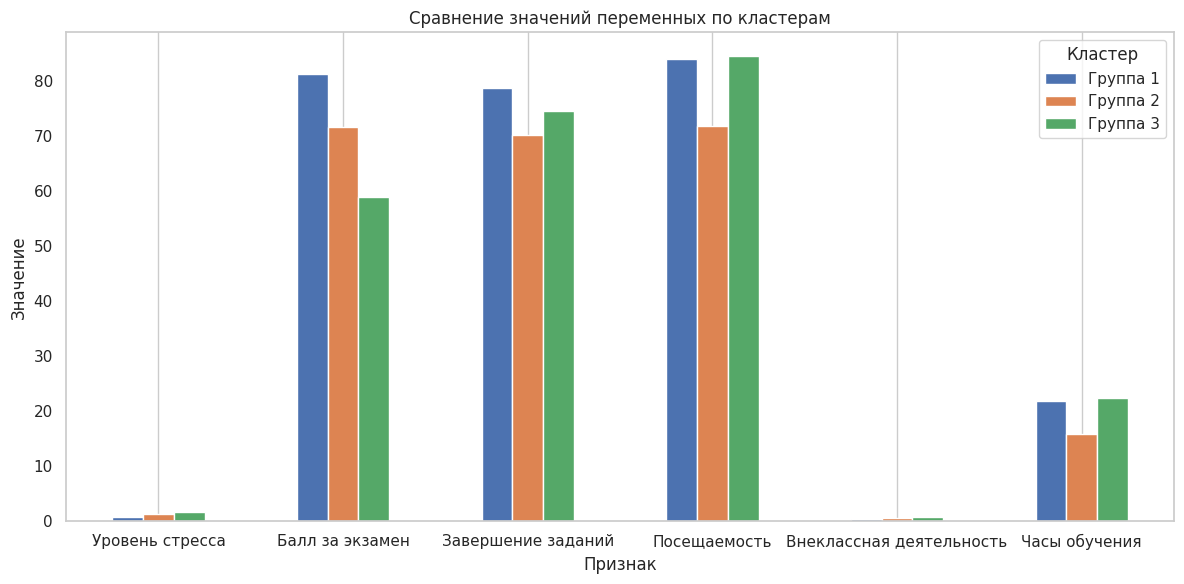

In [18]:
visualize_clusters_avg(y_kmeans)

<Figure size 800x600 with 0 Axes>

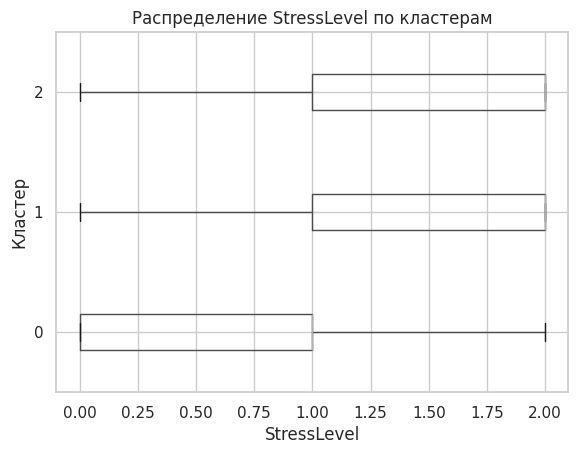

<Figure size 800x600 with 0 Axes>

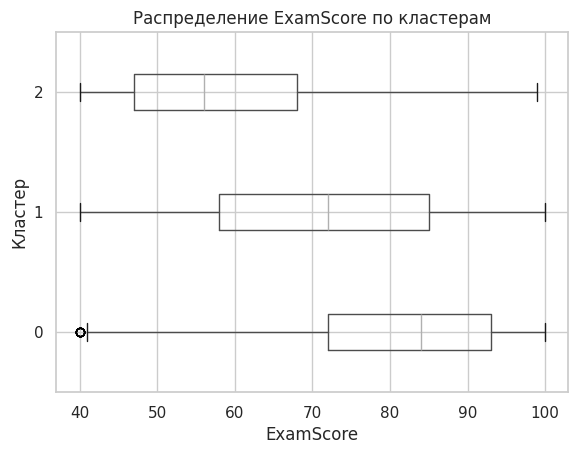

<Figure size 800x600 with 0 Axes>

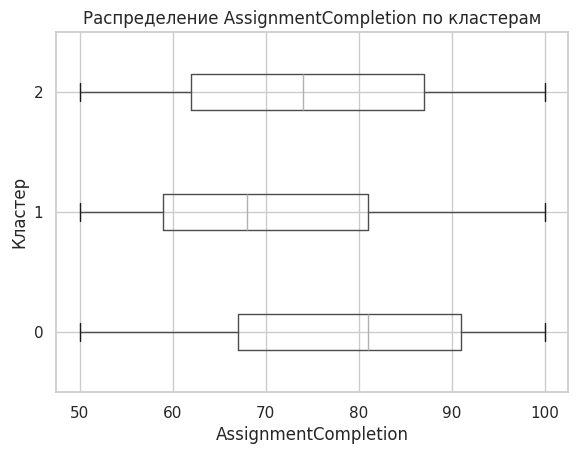

<Figure size 800x600 with 0 Axes>

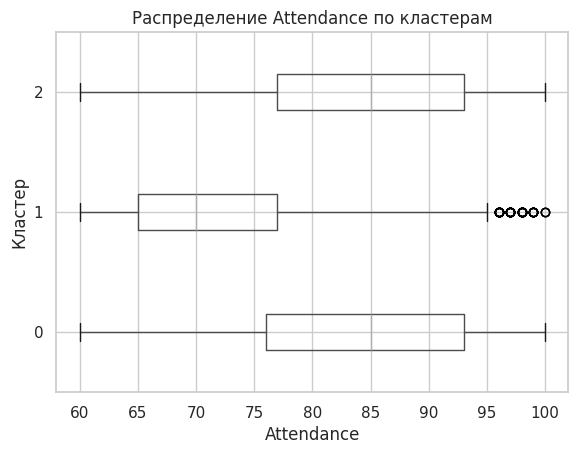

<Figure size 800x600 with 0 Axes>

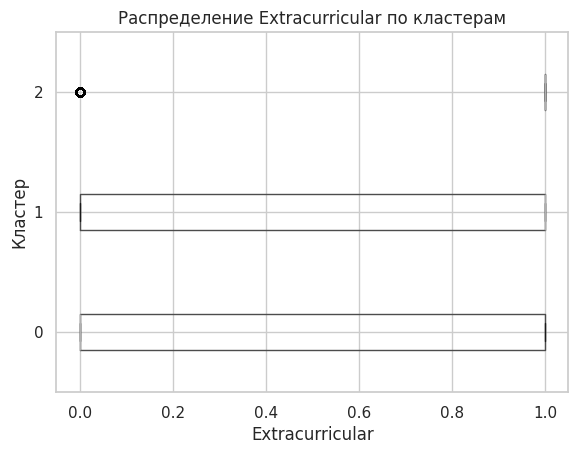

<Figure size 800x600 with 0 Axes>

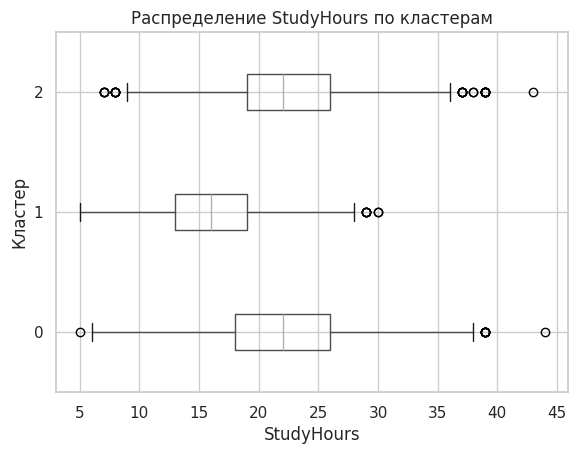

In [23]:
visualize_columns()

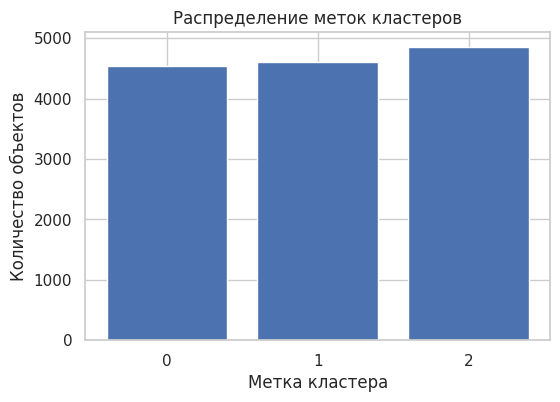

In [24]:
visual_cluster_count(y_kmeans)

Найдено кластеров: 3


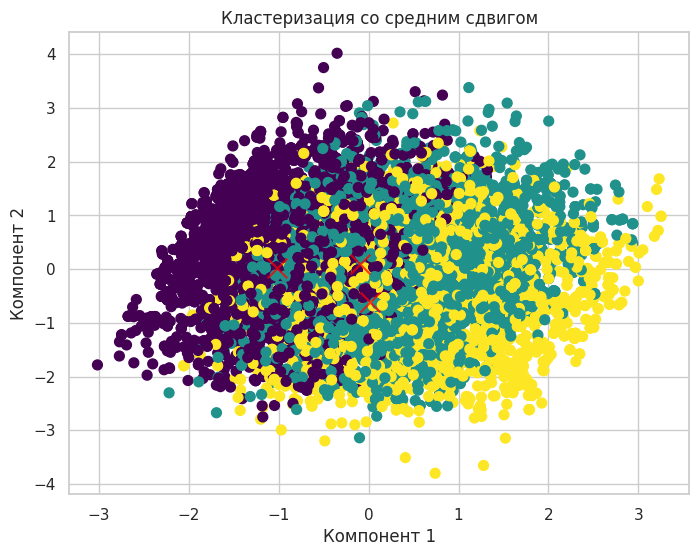

Силуэтовская оценка: 0.1498
Индекс Дэвиса-Болдуина: 2.1055
Индекс Калински-Харабаса: 2174.3397


In [25]:
# Кластеризация со средним сдвигом
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Оценка ширины полосы пропускания (bandwidth) для алгоритма MeanShift
bandwidth = estimate_bandwidth(X_scaled, quantile=0.03, n_samples=500)

# Кластеризация с использованием алгоритма со средним сдвигом
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift.fit(X_scaled)
predicted_labels = mean_shift.labels_
cluster_centers = mean_shift.cluster_centers_

n_clusters = len(np.unique(predicted_labels))
print(f"Найдено кластеров: {n_clusters}")

# Визуализация исходных данных
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predicted_labels, s=50, cmap='viridis')
cluster_centers_pca = pca.transform(cluster_centers)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.title("Кластеризация со средним сдвигом")
plt.xlabel("Компонент 1")
plt.ylabel("Компонент 2")
plt.show()

# Найти наиболее разрозненный кластер
largest_cluster_label = np.argmax(np.bincount(predicted_labels))

# Вычисление метрик качества
silhouette_avg = silhouette_score(X_scaled, predicted_labels)
davies_bouldin = davies_bouldin_score(X_scaled, predicted_labels)
calinski_harabasz = calinski_harabasz_score(X_scaled, predicted_labels)

print(f"Силуэтовская оценка: {silhouette_avg:.4f}")
print(f"Индекс Дэвиса-Болдуина: {davies_bouldin:.4f}")
print(f"Индекс Калински-Харабаса: {calinski_harabasz:.4f}")

         StressLevel  ExamScore  AssignmentCompletion  Attendance  \
Cluster                                                             
0           1.848585  66.783516             77.263582   79.523652   
1           1.437242  68.975447             74.890198   80.858574   
2           0.491034  76.299435             70.734463   80.161140   

         Extracurricular  StudyHours  
Cluster                               
0               1.000000   20.032844  
1               0.000000   20.054606  
2               0.854581   19.849423  


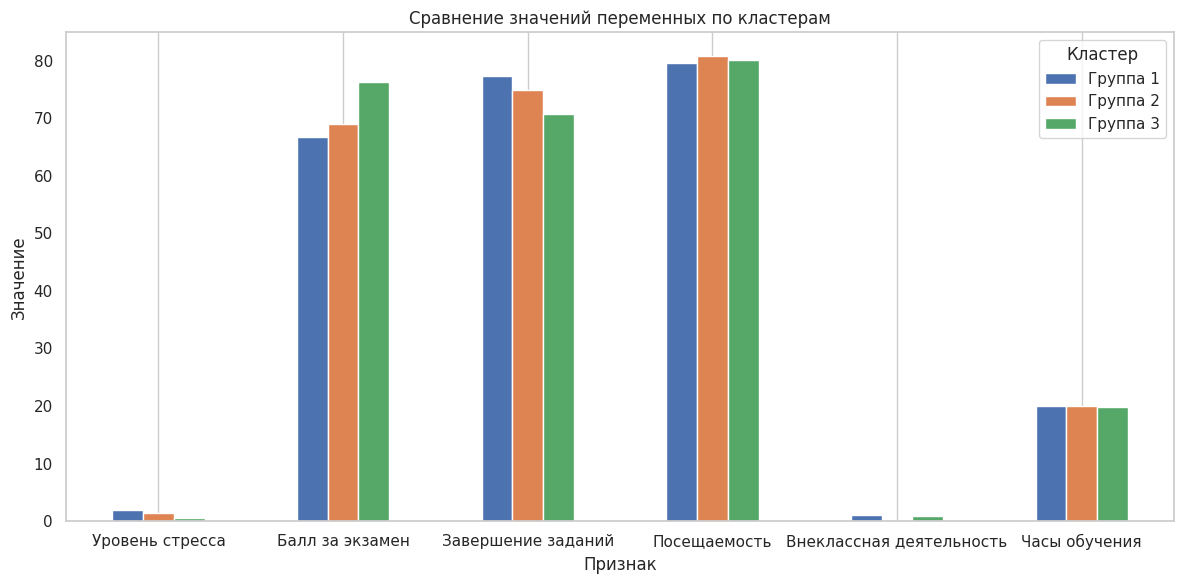

In [26]:
visualize_clusters_avg(predicted_labels)

<Figure size 800x600 with 0 Axes>

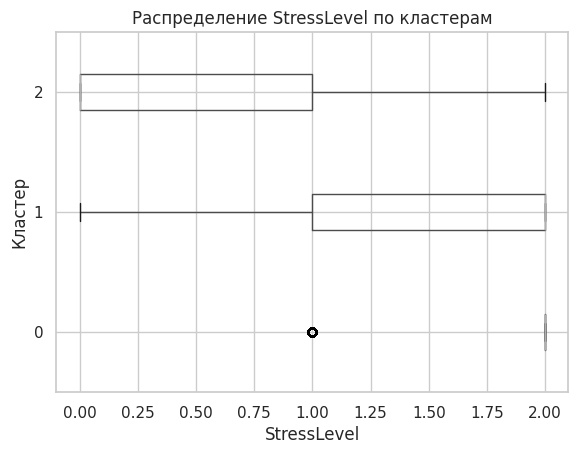

<Figure size 800x600 with 0 Axes>

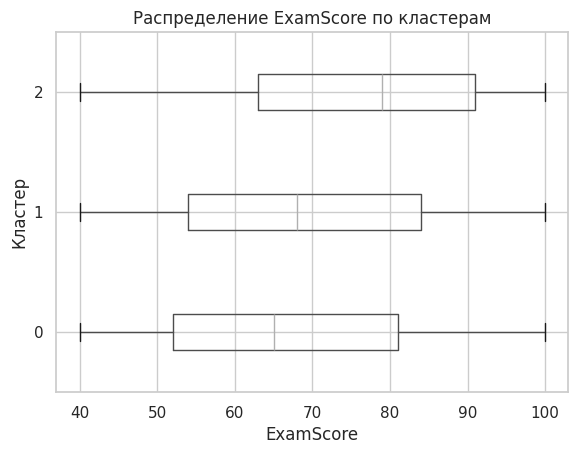

<Figure size 800x600 with 0 Axes>

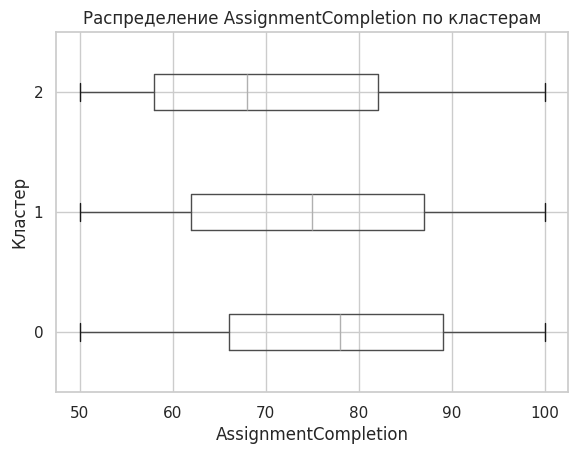

<Figure size 800x600 with 0 Axes>

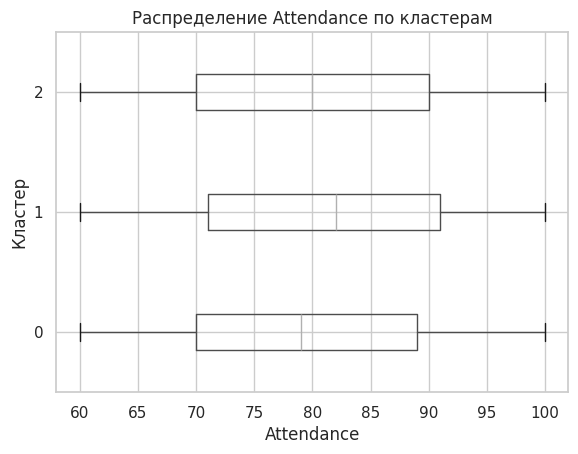

<Figure size 800x600 with 0 Axes>

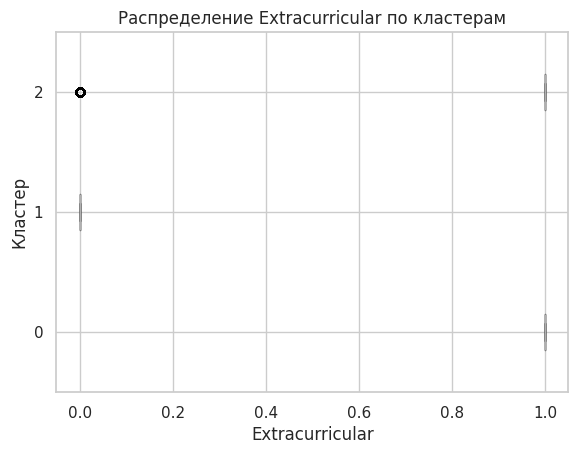

<Figure size 800x600 with 0 Axes>

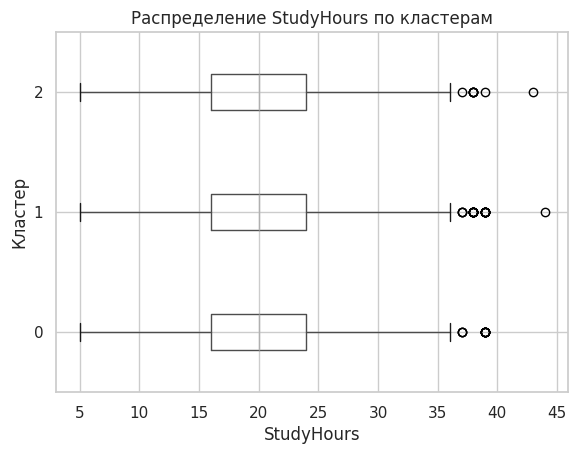

In [27]:
visualize_columns()

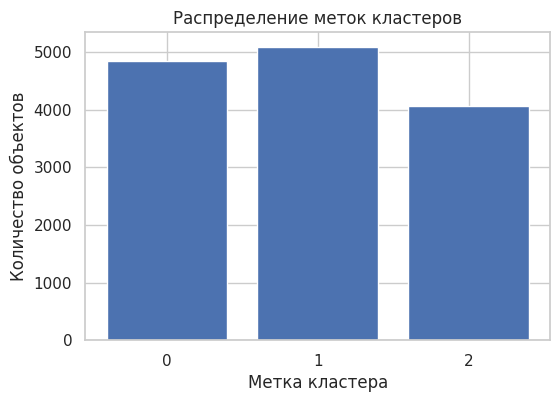

In [28]:
visual_cluster_count(predicted_labels)

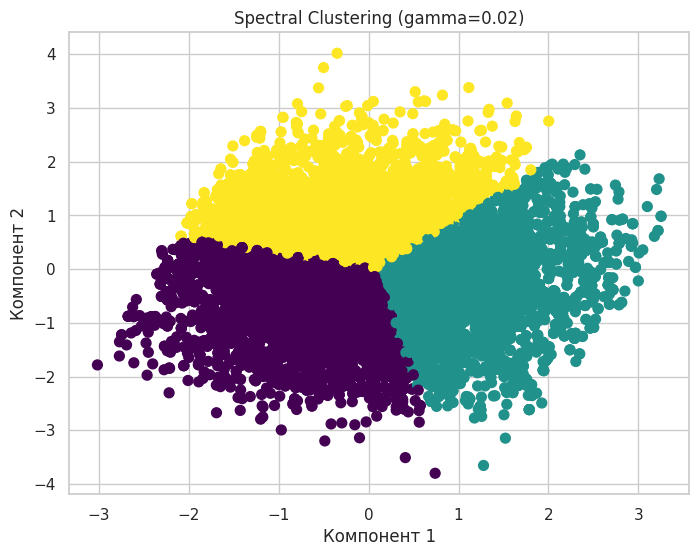

gamma=0.02
Силуэтовская оценка: 0.3431
Индекс Дэвиса-Болдуина: 0.9194
Индекс Калински-Харабаса: 8944.1707
------------------------------


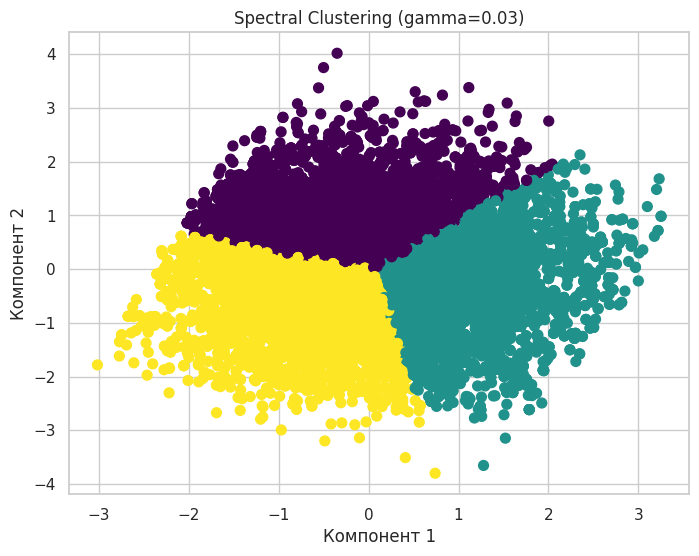

gamma=0.03
Силуэтовская оценка: 0.3431
Индекс Дэвиса-Болдуина: 0.9197
Индекс Калински-Харабаса: 8942.7332
------------------------------


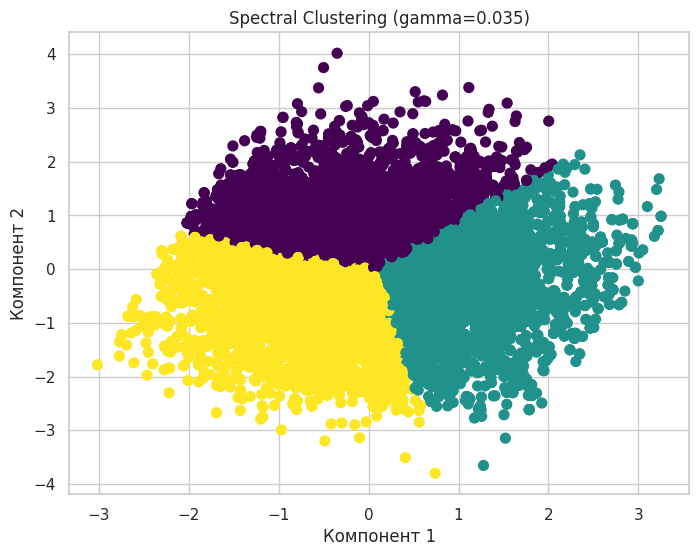

gamma=0.035
Силуэтовская оценка: 0.3431
Индекс Дэвиса-Болдуина: 0.9197
Индекс Калински-Харабаса: 8942.1506
------------------------------


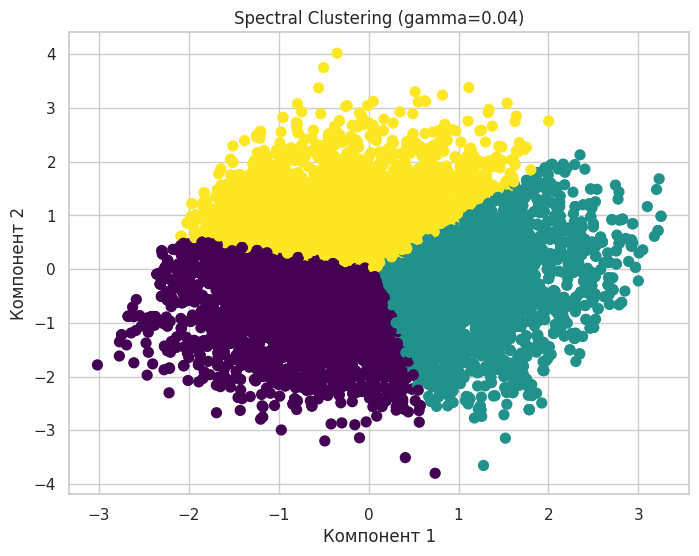

gamma=0.04
Силуэтовская оценка: 0.3431
Индекс Дэвиса-Болдуина: 0.9194
Индекс Калински-Харабаса: 8943.9186
------------------------------
Наилучшее значение гамма: 0.03
Наилучшая оценка силуэта: 0.3431


In [29]:
# Спектральная кластеризация
# подбор значения gamma
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import MeanShift, estimate_bandwidth, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Диапазон значений gamma для перебора
gamma_values = [0.02, 0.03, 0.035, 0.04]

best_silhouette = -1 # Инициализация лучшего силуэта
best_gamma = None # Инициализация лучшего gamma

# Цикл по значениям gamma
for gamma in gamma_values:
    # Spectral Clustering с текущим значением gamma
    spectral = SpectralClustering(n_clusters=3, affinity='rbf', gamma=gamma, random_state=42)
    predicted_labels = spectral.fit_predict(X_pca)

    # Визуализация кластеров
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predicted_labels, s=50, cmap='viridis')
    plt.title(f"Spectral Clustering (gamma={gamma})")
    plt.xlabel("Компонент 1")
    plt.ylabel("Компонент 2")
    plt.show()

    # Вычисление метрик качества
    silhouette_avg = silhouette_score(X_pca, predicted_labels)
    davies_bouldin = davies_bouldin_score(X_pca, predicted_labels)
    calinski_harabasz = calinski_harabasz_score(X_pca, predicted_labels)

    print(f"gamma={gamma}")
    print(f"Силуэтовская оценка: {silhouette_avg:.4f}")
    print(f"Индекс Дэвиса-Болдуина: {davies_bouldin:.4f}")
    print(f"Индекс Калински-Харабаса: {calinski_harabasz:.4f}")
    print("-" * 30)
  # Если текущий силуэт лучше предыдущего, сохраняем его
    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_gamma = gamma

print("=" * 30)
print(f"Наилучшее значение гамма: {best_gamma}")
print(f"Наилучшая оценка силуэта: {best_silhouette:.4f}")

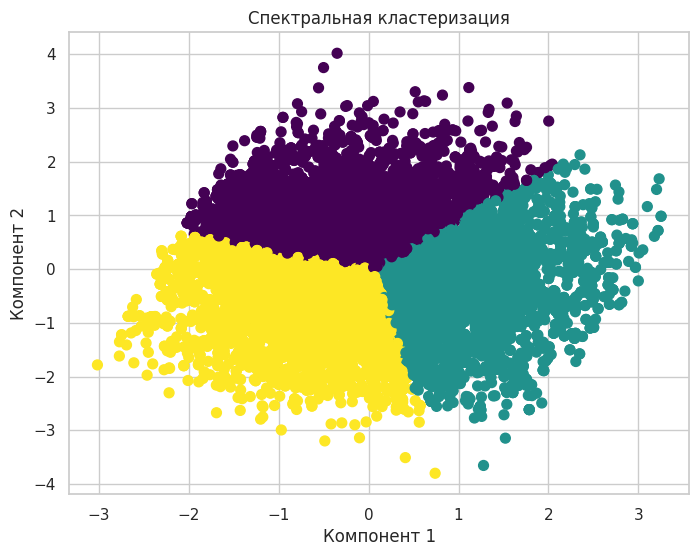

Силуэтовская оценка: 0.3431
Индекс Дэвиса-Болдуина: 0.9197
Индекс Калински-Харабаса: 8942.7332


In [30]:
# Спектральная кластеризация с лучшей gamma
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import MeanShift, estimate_bandwidth, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Применение спектральной кластеризации
n_clusters = 3  # Устанавливаем количество кластеров
spectral = SpectralClustering(n_clusters=n_clusters, affinity='rbf', gamma=0.03, random_state=42)
predicted_labels = spectral.fit_predict(X_pca)

# Визуализация кластеров после спектральной кластеризации
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predicted_labels, s=50, cmap='viridis')
plt.title("Спектральная кластеризация")
plt.xlabel("Компонент 1")
plt.ylabel("Компонент 2")
plt.show()

# Найти наиболее разрозненный кластер
largest_cluster_label = np.argmax(np.bincount(predicted_labels))

# Вычисление метрик качества
silhouette_avg = silhouette_score(X_pca, predicted_labels)
davies_bouldin = davies_bouldin_score(X_pca, predicted_labels)
calinski_harabasz = calinski_harabasz_score(X_pca, predicted_labels)

print(f"Силуэтовская оценка: {silhouette_avg:.4f}")
print(f"Индекс Дэвиса-Болдуина: {davies_bouldin:.4f}")
print(f"Индекс Калински-Харабаса: {calinski_harabasz:.4f}")

         StressLevel  ExamScore  AssignmentCompletion  Attendance  \
Cluster                                                             
0           1.622880  62.428418             77.118051   87.062030   
1           0.731538  82.764534             77.062177   81.104826   
2           1.522806  66.577623             69.677644   72.820004   

         Extracurricular  StudyHours  
Cluster                               
0               0.688345   23.411462  
1               0.351740   20.280584  
2               0.725302   16.457353  


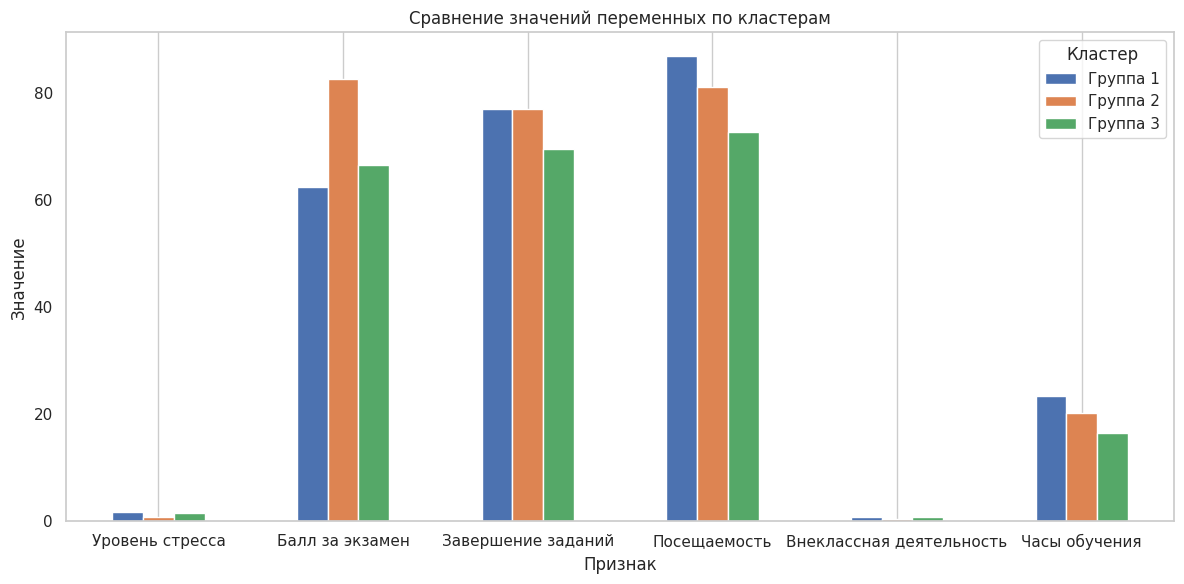

In [31]:
visualize_clusters_avg(predicted_labels)

<Figure size 800x600 with 0 Axes>

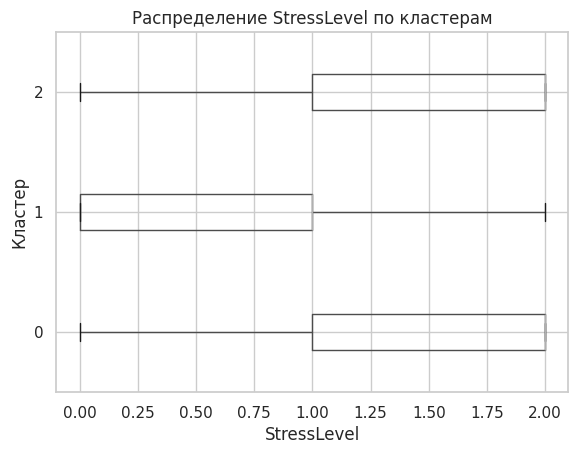

<Figure size 800x600 with 0 Axes>

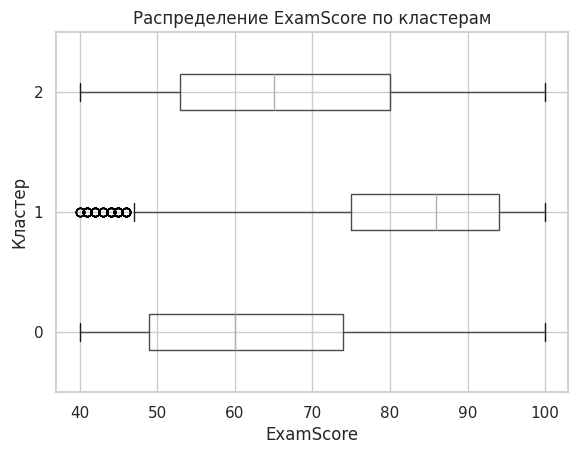

<Figure size 800x600 with 0 Axes>

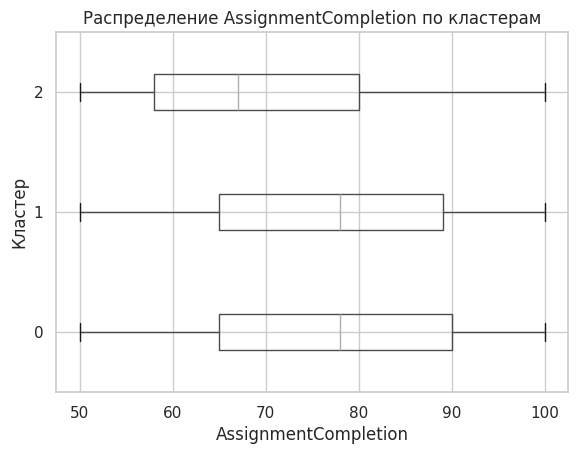

<Figure size 800x600 with 0 Axes>

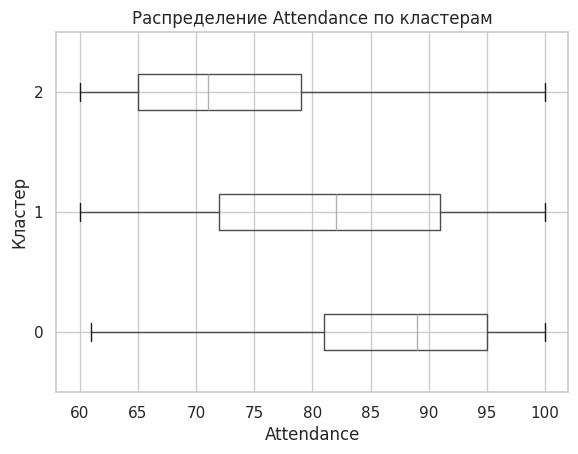

<Figure size 800x600 with 0 Axes>

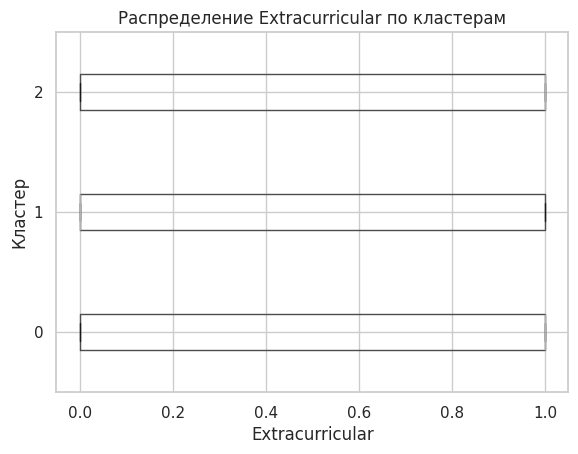

<Figure size 800x600 with 0 Axes>

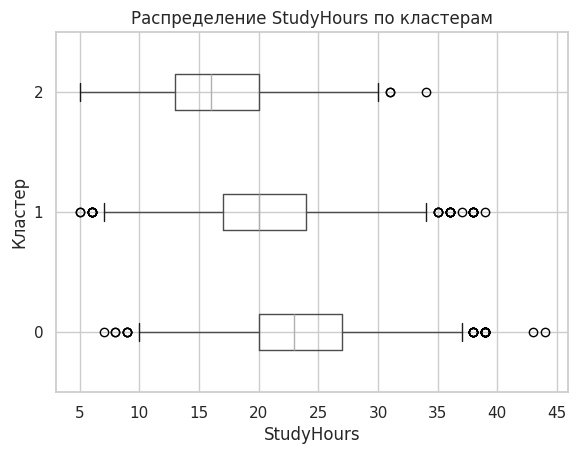

In [32]:
visualize_columns()

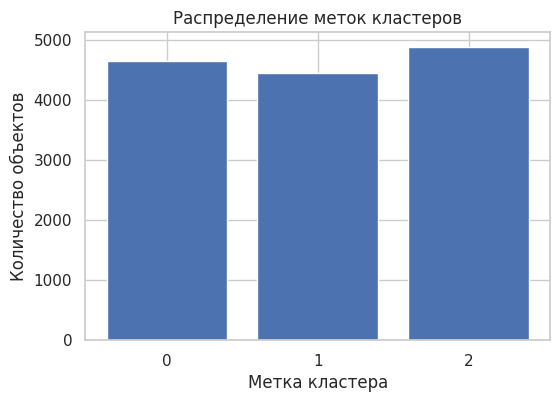

In [33]:
visual_cluster_count(predicted_labels)

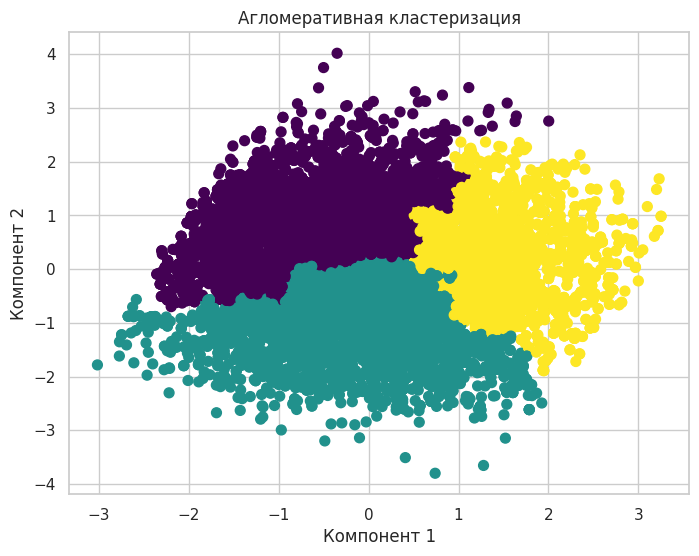

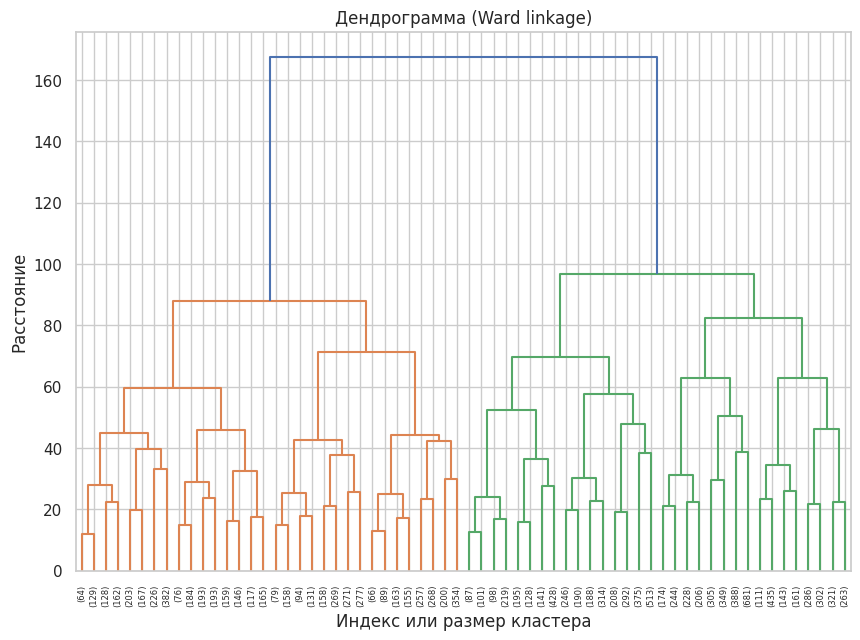

Силуэтовская оценка: 0.3141
Индекс Дэвиса-Болдуина: 0.9984
Индекс Калински-Харабаса: 7899.6827


In [34]:
# Агломеративная кластеризация
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Применение агломеративной кластеризации
n_clusters = 3  # Устанавливаем количество кластеров
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
predicted_labels = agg_clustering.fit_predict(X_pca)

# Визуализация кластеров после агломеративной кластеризации
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predicted_labels, s=50, cmap='viridis')
plt.title("Агломеративная кластеризация")
plt.xlabel("Компонент 1")
plt.ylabel("Компонент 2")
plt.show()

# Визуализация дендрограммы
plt.figure(figsize=(10, 7))
Z = linkage(X_scaled, method='ward') # метод Уорда
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Дендрограмма (Ward linkage)')
plt.xlabel('Индекс или размер кластера')
plt.ylabel('Расстояние')
plt.show()

# Вычисление метрик качества
silhouette_avg = silhouette_score(X_pca, predicted_labels)
davies_bouldin = davies_bouldin_score(X_pca, predicted_labels)
calinski_harabasz = calinski_harabasz_score(X_pca, predicted_labels)

print(f"Силуэтовская оценка: {silhouette_avg:.4f}")
print(f"Индекс Дэвиса-Болдуина: {davies_bouldin:.4f}")
print(f"Индекс Калински-Харабаса: {calinski_harabasz:.4f}")

         StressLevel  ExamScore  AssignmentCompletion  Attendance  \
Cluster                                                             
0           1.700365  59.586131             74.996350   84.024453   
1           1.213127  74.351244             71.287414   73.380094   
2           0.745381  82.695331             79.583137   85.838428   

         Extracurricular  StudyHours  
Cluster                               
0               0.747080   22.079927  
1               0.594483   16.488100  
2               0.312059   22.654686  


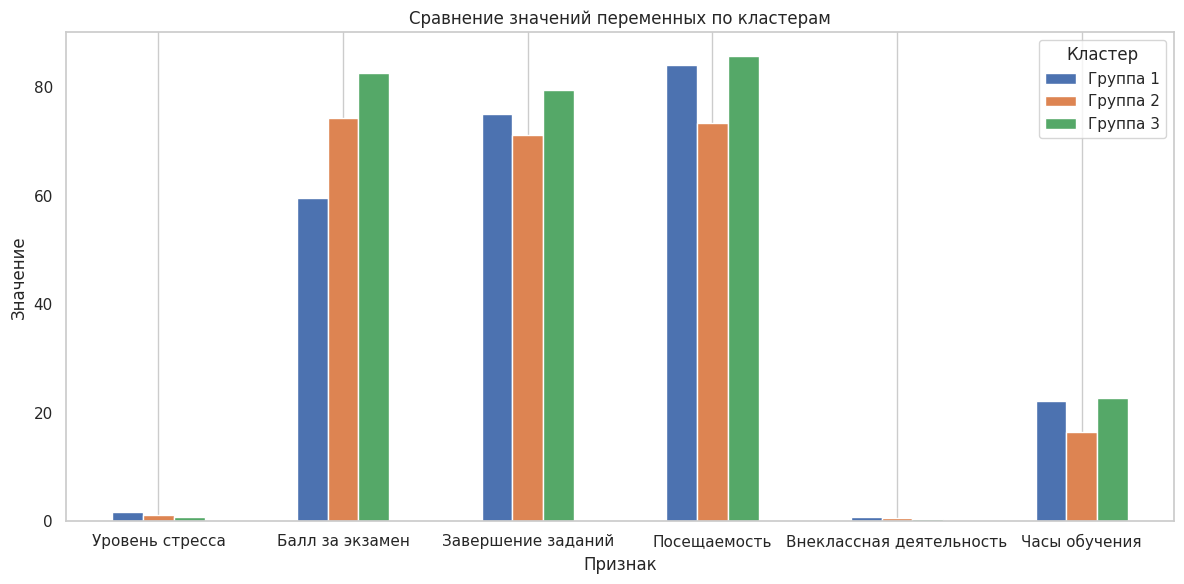

In [35]:
visualize_clusters_avg(predicted_labels)

<Figure size 800x600 with 0 Axes>

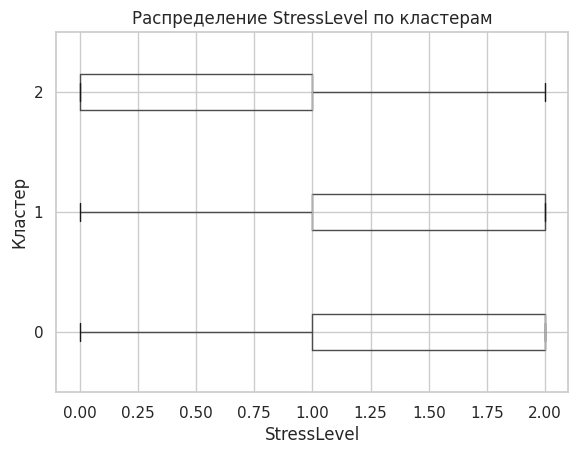

<Figure size 800x600 with 0 Axes>

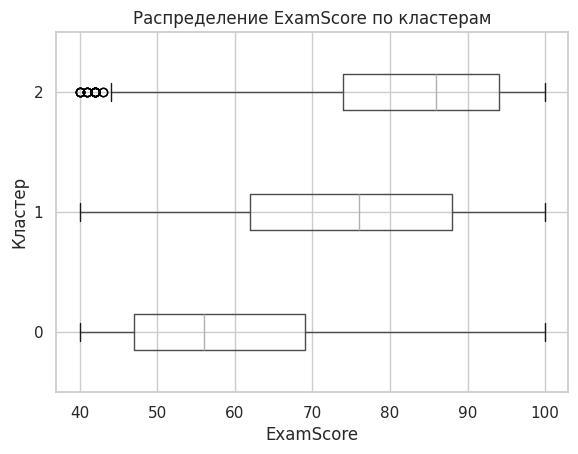

<Figure size 800x600 with 0 Axes>

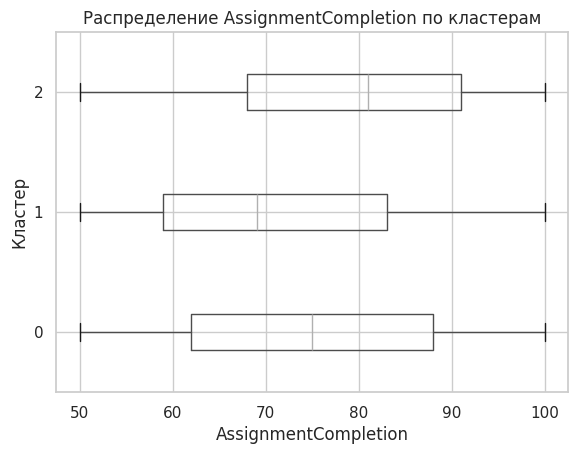

<Figure size 800x600 with 0 Axes>

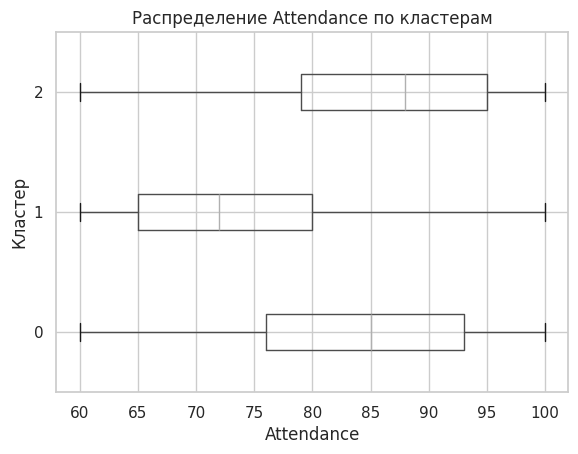

<Figure size 800x600 with 0 Axes>

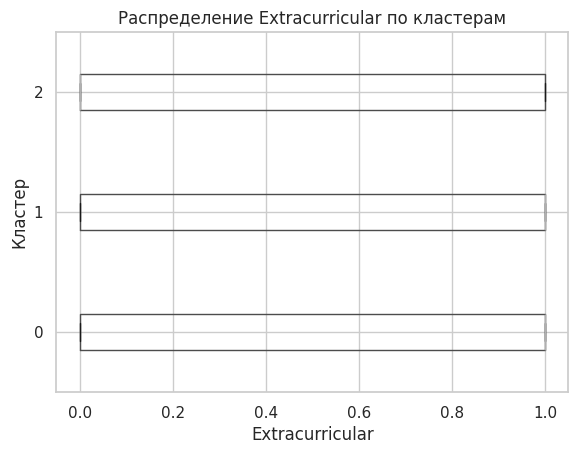

<Figure size 800x600 with 0 Axes>

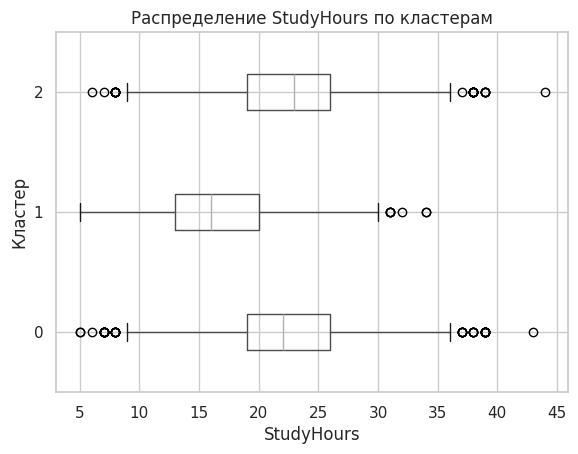

In [36]:
visualize_columns()

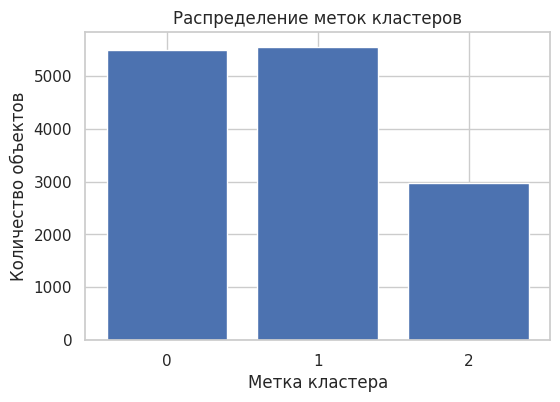

In [37]:
visual_cluster_count(predicted_labels)

Создание ансамбля моделей

/tmp/ipython-input-1503705406.py:33: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='ward')


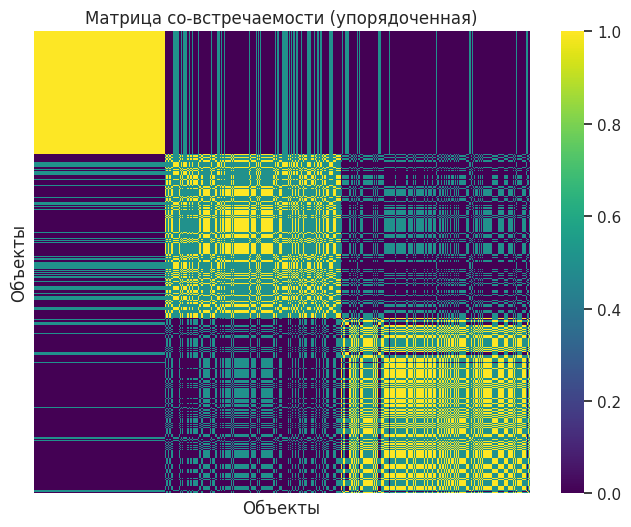

In [38]:
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, estimate_bandwidth
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster
import seaborn as sns

# Список алгоритмов кластеризации
clustering_algorithms = [
    KMeans(n_clusters=3, random_state=42, n_init=10),
    AgglomerativeClustering(n_clusters=3, linkage='ward')
]

# Создаем матрицу со-встречаемости
co_association_matrix = np.zeros((len(X_scaled[:500]), len(X_scaled[:500])))
num_algorithms = len(clustering_algorithms)

for algorithm in clustering_algorithms:
    labels = algorithm.fit_predict(X_scaled[:500])
    for i in range(len(X_scaled[:500])):
        for j in range(len(X_scaled[:500])):
            if labels[i] == labels[j]:
                co_association_matrix[i, j] += 1

# Нормализуем матрицу
co_association_matrix /= num_algorithms

# Кластеризуем матрицу со-встречаемости (используем иерархическую кластеризацию)
# Преобразуем матрицу со-встречаемости в матрицу расстояний
distance_matrix = 1 - co_association_matrix
linkage_matrix = linkage(distance_matrix, method='ward')
final_labels = fcluster(linkage_matrix, t=3, criterion='maxclust')  # t - количество кластеров

# Переупорядочиваем матрицу со-встречаемости в соответствии с метками кластеров
cluster_order = np.argsort(final_labels)
ordered_co_association_matrix = co_association_matrix[cluster_order][:, cluster_order]

# Визуализируем переупорядоченную матрицу
plt.figure(figsize=(8, 6))
sns.heatmap(ordered_co_association_matrix, cmap="viridis", xticklabels=False, yticklabels=False)
plt.title("Матрица со-встречаемости (упорядоченная)")
plt.xlabel("Объекты")
plt.ylabel("Объекты")
plt.show()

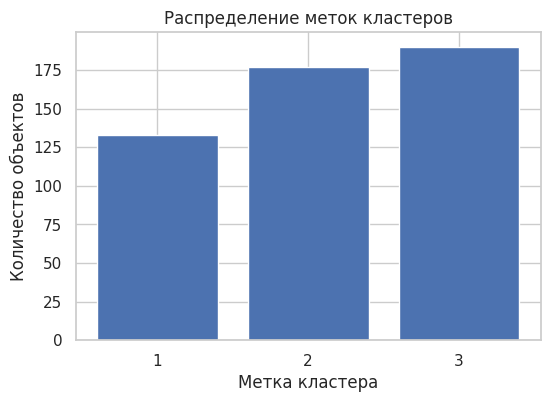

In [39]:
visual_cluster_count(final_labels)

Сравнение метрик

In [40]:
# K-means
# Силуэтовская оценка: 0.3389
# Индекс Дэвиса-Болдуина: 0.9256
# Индекс Калински-Харабаза: 8815.6737

# Кластеризация со средним сдвигом
# Силуэтовская оценка: 0.1498
# Индекс Дэвиса-Болдуина: 2.1055
# Индекс Калински-Харабаза: 2174.3397

# Спектральная кластеризация
# Силуэтовская оценка: 0.3431
# Индекс Дэвиса-Болдуина: 0.9197
# Индекс Калински-Харабаза: 8942.7332

# Агломеративная кластеризация
# Силуэтовская оценка: 0.3141
# Индекс Дэвиса-Болдуина: 0.9984
# Индекс Калински-Харабаза: 7899.6827